# Implement a Support Vector Machine to classify image of cats and dogs based on the data

## 1. Importing the libraries needed

In [1]:
import pandas as pd
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"sampleSubmission.csv")

In [3]:
data

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
12495,12496,0
12496,12497,0
12497,12498,0
12498,12499,0


In [4]:
data["label"].value_counts()

label
0    12500
Name: count, dtype: int64

## 2. Data preprcessing

In [5]:
def load_file(folder,label ,  img_size = (64,64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder,filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_flattened = img.flatten()
            images.append(img_flattened)
            labels.append(label)
    return images, labels

In [6]:
cats_path = r'C:\Users\mayank dandriyal\Desktop\prodigy_internship\task3\train'
dogs_path = r'C:\Users\mayank dandriyal\Desktop\prodigy_internship\task3\dogs'

In [7]:
dog_images, dog_labels = load_file(dogs_path , label= 1)

In [8]:
cat_images, cats_labels = load_file(cats_path, label= 0)

In [9]:
cat_images

[array([170, 176, 183, ...,   2,   2,   2], dtype=uint8),
 array([43, 42, 36, ..., 72, 68, 29], dtype=uint8),
 array([ 45,  45,  47, ..., 151, 171, 158], dtype=uint8),
 array([221, 222, 231, ..., 220, 214, 213], dtype=uint8),
 array([114, 122,  85, ..., 105,  94,  87], dtype=uint8),
 array([ 8,  8,  8, ..., 17, 14, 13], dtype=uint8),
 array([113, 114, 119, ..., 170, 177, 162], dtype=uint8),
 array([58, 62, 62, ..., 47, 38, 24], dtype=uint8),
 array([239, 242, 242, ...,  91,  63, 103], dtype=uint8),
 array([ 80,  76,  75, ..., 178, 172, 162], dtype=uint8),
 array([145, 148, 148, ..., 239, 252, 241], dtype=uint8),
 array([148, 145, 150, ...,  72,  61,  53], dtype=uint8),
 array([177, 178, 178, ..., 148, 154, 162], dtype=uint8),
 array([148, 157, 166, ..., 141, 113, 124], dtype=uint8),
 array([201, 201, 203, ..., 133, 132, 127], dtype=uint8),
 array([ 43,  47,  39, ...,  69, 101, 108], dtype=uint8),
 array([93, 95, 96, ..., 81, 79, 83], dtype=uint8),
 array([130, 144, 157, ..., 213, 211, 

In [10]:
cats_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [11]:
len(cat_images)

9094

In [12]:
len(dog_images)

12500

In [13]:
x = np.array(cat_images + dog_images)

In [14]:
x

array([[170, 176, 183, ...,   2,   2,   2],
       [ 43,  42,  36, ...,  72,  68,  29],
       [ 45,  45,  47, ..., 151, 171, 158],
       ...,
       [ 38,  48,  46, ..., 212, 136, 170],
       [254, 246, 228, ..., 120, 116, 118],
       [241, 242, 241, ..., 254, 254, 254]], dtype=uint8)

In [15]:
y = np.array(cats_labels + dog_labels)

In [16]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
len(y)

21594

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size= 0.2 , random_state= 42)

## 3. Initilazing and fitting the model with the data

In [19]:
model = SVC()

In [20]:
model.fit(x_train, y_train)

SVC()

In [21]:
y_pred = model.predict(x_test)

In [22]:
score = accuracy_score(y_pred, y_test)

In [23]:
score

0.6672840935401714

In [24]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.44      0.65      0.53      1223
           1       0.83      0.67      0.74      3096

    accuracy                           0.67      4319
   macro avg       0.64      0.66      0.64      4319
weighted avg       0.72      0.67      0.68      4319



In [33]:
def preprocess(image_path , img_size = (64,64)):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.resize(img, img_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_flattened = img.flatten()
        return img_flattened
    return None

In [36]:
def display(images_folder, model, img_size = (64,64)):
    for filename in os.listdir(images_folder):
        img_path = os.path.join(images_folder, filename)
        img_flattened = preprocess(img_path, img_size)
        if img_flattened is not None:
            img_flattened = img_flattened.reshape(1,-1)
            prediction = model.predict(img_flattened)
            label = "Cat" if prediction == 0 else "Dog"
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.title(f"The image is:- {label}")
            plt.axis("off")
            plt.show()

## 4. Predicting the output for images to test the model

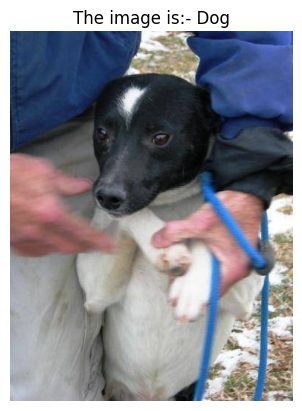

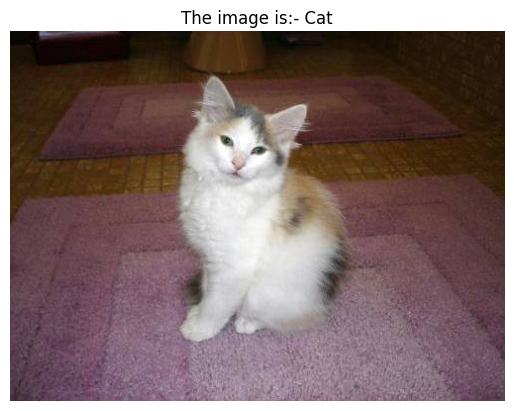

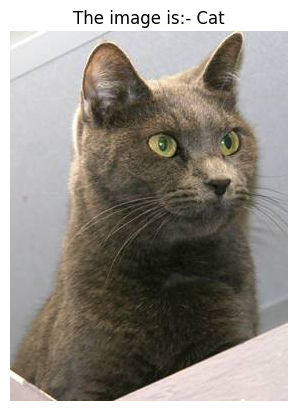

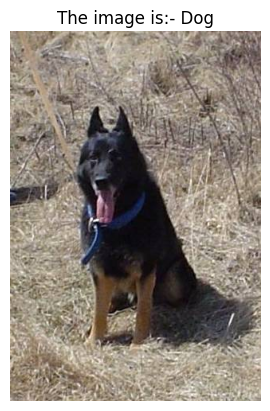

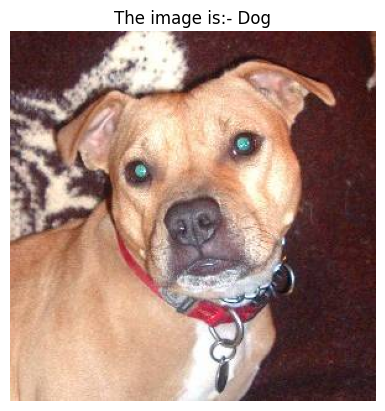

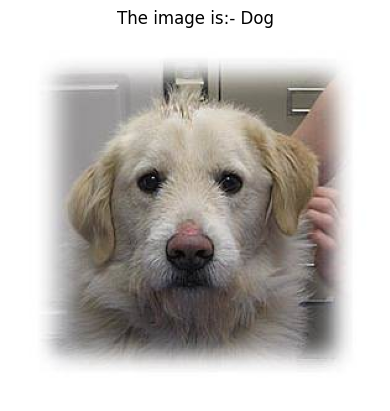

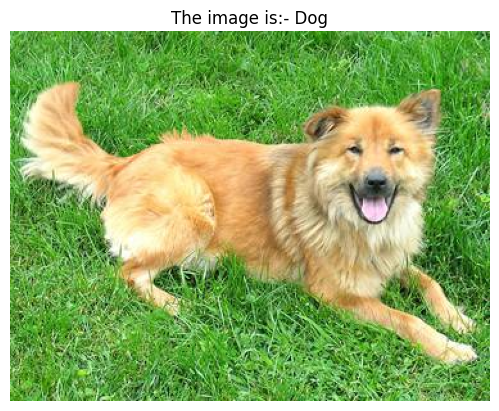

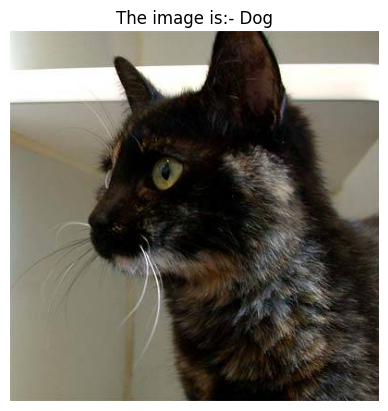

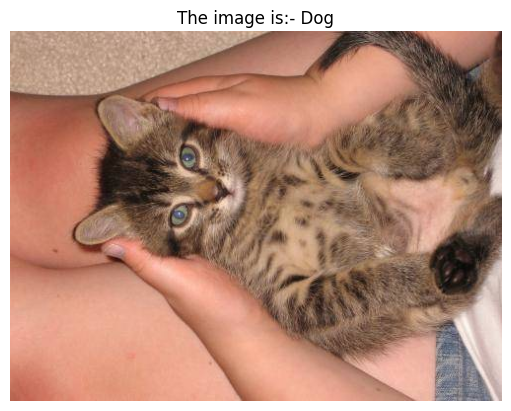

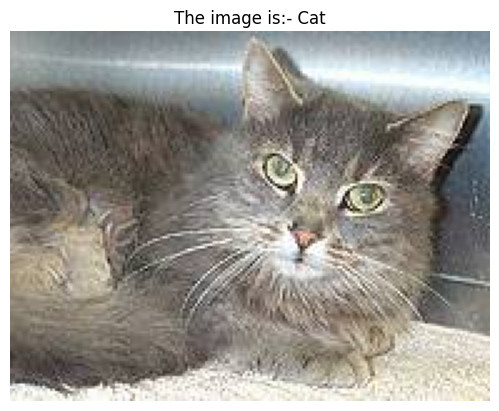

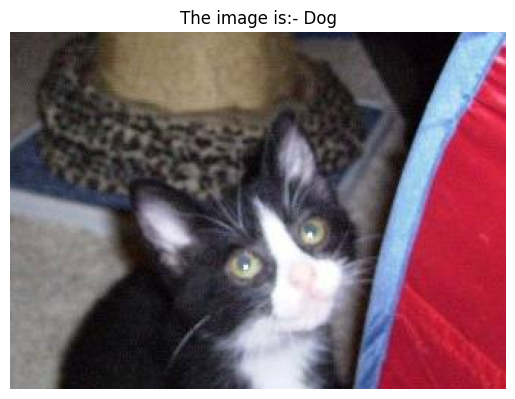

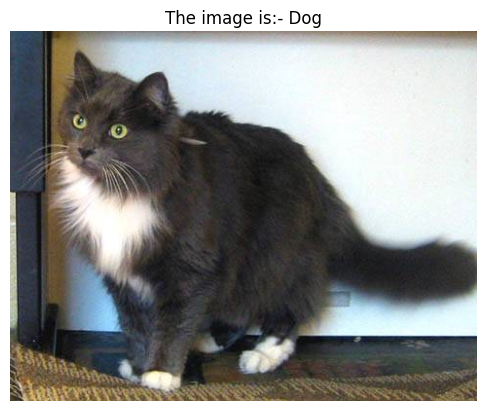

In [38]:
test_image_folder = r"C:\Users\mayank dandriyal\Desktop\prodigy_internship\task3\test1"
display(test_image_folder, model)